### Solution for Barber Exercise 15.2



### Performing a PCA analysis

(400, 1200) (400, 1)


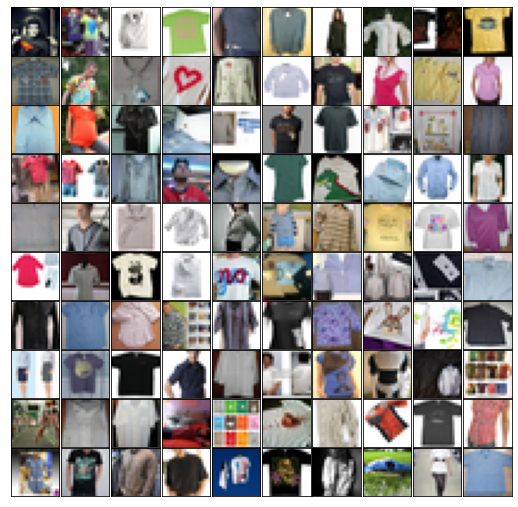

In [7]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import numpy as np

# create paths for all images
shirt_images = glob('shirt_train/*')
jerseys_images = glob('jersey_train/*')

shirts = []
jerseys = []
# for each image path
for path in shirt_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            if image.mode != "RGB":
                image = image.convert('RGB')
            # image = image.convert('L')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 20])
            # flatten the matrix to an array and append it to all flattened images
            shirts.append(np.array(cover).flatten())

for path in jerseys_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            if image.mode != "RGB":
                image = image.convert('RGB')
            # image = image.convert('L')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 20])
            # flatten the matrix to an array and append it to all flattened images
            jerseys.append(np.array(cover).flatten())

shirts = np.asarray(shirts)
jerseys = np.asarray(jerseys)

X = np.concatenate((shirts, jerseys))
Y = np.concatenate((np.zeros(len(shirts)), np.ones(len(jerseys)))).reshape(-1, 1)
print(X.shape, Y.shape)

fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(20,20,3), cmap="gray")

# (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(X, Y, test_size=0.5, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


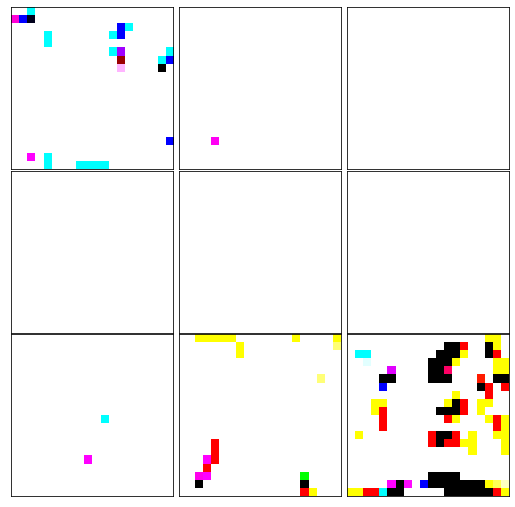

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(0.9)
pca.fit(X)
rescaled = pca.transform(X)
scaled = pca.inverse_transform(rescaled)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(scaled[i].reshape(20, 20, 3))

/var/folders/fc/g11j1bt552j3dc6g0ngw41hh0000gn/T/ipykernel_13030/1063313337.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


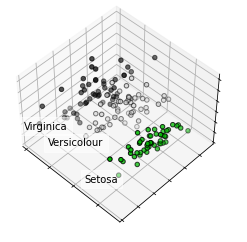

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()